# Compare the runtime of matrix multiplication program

## Directory Structure
- `21127229.ipynb` (this file): The main notebook file containing the source code for matrix multiplication in Python and NumPy, used for execution and plotting runtime comparisons.
- `21127229.cpp`: The source code file for matrix multiplication in C++, and it stores the execution times for each matrix size in the `21127229.txt` file.
- `21127229.txt`: A text file that stores the execution times of matrix multiplication, with each time recorded on a separate line.

## Explanation of the Program
The program follows the following steps:
1. Initialize two lists of matrices with increasing sizes n x n. 

2. Perform matrix multiplication using NumPy, Python, and C++:
   - NumPy: Utilizes the `np.dot` function for matrix multiplication.
   - Python: Converts the data type from ndarray to a list and uses a `for` loop to compute the multiplication according to the matrix multiplication definition.
   - C++: Also employs a `for` loop for iteration and computation, followed by recording the execution time and saving it to the `21127229.txt` file.

3. Record the execution times (for C++, it loads data from the text file) and plot a graph to provide a visual comparison of the execution times.

4. Provide observations and explanations based on the results.

## Import Libraries

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Create matrix with different sizes

In [2]:
# For convenience, I would like to only perform square matrix multiplications
# Different sizes for matrix A and matrix B
matrix_sizes = [50,100,300,500,700,1000,1500,2000]
# Random matrix lists
A_list= [np.random.randint(10,size=(size,size))for size in matrix_sizes]
B_list= [np.random.randint(10,size=(size,size))for size in matrix_sizes]

## Numpy

In [3]:
numpy_time = []
for a,b in zip(A_list,B_list):
    start = time.time()
    result = np.dot(a, b)
    end = time.time()
    
    numpy_time.append(end - start)
print(numpy_time)

[0.0003879070281982422, 0.0007421970367431641, 0.0201568603515625, 0.08564448356628418, 0.259537935256958, 1.1278126239776611, 5.505750894546509, 27.918118476867676]


# Python

In [4]:
python_time = []

for a, b in zip(A_list, B_list):
    
    a = a.tolist()
    b = b.tolist()
    size = len(a)
    C = [[0 for _ in range(size)] for _ in range(size)]
    start = time.time()
    for i in range(size):
        for j in range(size):
            for k in range(size):
                C[i][j] += a[i][k] * b[k][j]

    end = time.time()
    python_time.append(end - start)
print(python_time)
    

[0.026290416717529297, 0.18269872665405273, 6.1058759689331055, 30.855937957763672, 74.98916268348694, 219.9918475151062, 862.8398339748383, 1912.916105747223]


# C++

The source code of the matrix multiplication program in C++ is written in file `21127229.cpp`, the runtime corresponding to the matrix sizes will be saved in file `21127229.txt`


In [5]:
# Compile c++ file, runtime with each size is written to file 21127229.txt
!g++ 21127229.cpp -o output_21127229
!./output_21127229

# Comparison of Execution Time

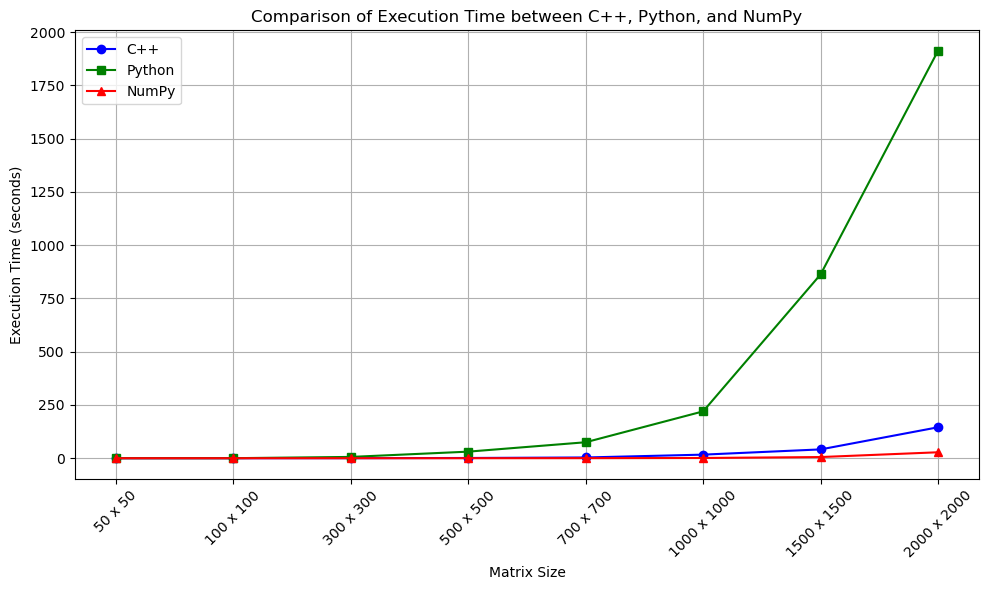

In [6]:
matrix_sizes_str = [f'{size} x {size}' for size in matrix_sizes]

# Load runtime data using C++ from file '21127229.txt'
with open('21127229.txt', 'r') as file:
    cplusplus_time = [float(line.strip()) for line in file]
    
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes_str, cplusplus_time, label='C++',marker='o', color='blue')
plt.plot(matrix_sizes_str, python_time, label='Python', marker='s',color='green')
plt.plot(matrix_sizes_str, numpy_time, label='NumPy', marker='^',color='red')


plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Time between C++, Python, and NumPy')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Explanation

## Results:
- Python is the slowest performer, taking the most time to complete the matrix multiplication task, especially with larger matrix sizes. For a matrix size of 2000 x 2000, it took nearly 30 minutes.
- C++ demonstrates a significant performance improvement over Python. With a matrix size of 2000 x 2000, it only required approximately 3 minutes to complete the task.
- NumPy stands out as the fastest performer among the three. It surpasses C++ in speed, completing the matrix multiplication for a 2000 x 2000 matrix in about 30 seconds.

## Why Python Runs Slower than C++
Python is known for its simplicity and ease of use, but it often runs slower than C++. There are several reasons for this performance difference:

1. **Interpreted Language**: Python is an interpreted language, while C++ is a compiled language. In compiled languages like C++, the source code is compiled into machine code before execution, allowing the compiler to perform various optimizations. In contrast, Python's interpreter translates the source code into machine code at runtime, which can result in slower execution.

2. **Dynamic Typing**: Python uses dynamic typing, meaning that variables are not associated with specific data types until runtime. Each variable is essentially a reference to an object that contains both the value and metadata, such as data type information. When performing operations with objects in Python, the interpreter needs to spend time opening these objects to identify their data types. This dynamic typing flexibility comes at the cost of slower execution compared to the static typing of C++, where data types are known at compile time.

3. **Automatic Memory Management**: Python incorporates automatic memory management (garbage collection), which adds extra work and time to determine when to free allocated memory. In C++, memory management is explicitly controlled by the programmer, allowing for more efficient memory usage.


## Why NumPy Can Be Faster Than C++
NumPy is a powerful library in Python for numerical and scientific computing. In some cases, NumPy can outperform equivalent C++ code. There are a few reasons for this surprising advantage:

1. **Vectorization**: NumPy operations are typically vectorized, meaning they are applied to entire arrays of data at once. This is possible because NumPy is built on top of highly optimized libraries (like BLAS and LAPACK) and uses efficient low-level languages like C and Fortran for its core computations. In contrast, C++ code often requires explicit loops to iterate over data elements, which can be less efficient.

2. **Type Coherence**: NumPy enforces type coherence for elements within arrays. In C++, when working with arrays, you may use different data types, leading to type-related issues. NumPy's homogeneous data structure simplifies memory management and operations, potentially reducing overhead.

3. **Memory Efficiency**: NumPy efficiently utilizes memory and minimizes copying of data. In C++, manual memory management can lead to inefficient memory usage or the need for deep copying of data, which can slow down operations.

4. **Parallelization**: NumPy can use multi-core processors by internally parallelizing certain operations. C++ code might require additional effort to implement parallelization effectively.

5. **Library Integration**: NumPy leverages highly optimized external libraries often written in C or Fortran for complex operations. These libraries are designed for numerical computations, giving NumPy an edge in terms of Python